In [170]:
from selenium import webdriver
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

# setter webdriver som Chrome
driver = webdriver.Chrome()

# bruker webdriver å besøke Lindesnes kommune fakta-side
url1 = "https://www.ssb.no/kommunefakta/lindesnes"
driver.get(url1)

# får gjengitte HTML-innholdet, vil returnere HTML-strengen
html_content = driver.page_source

# bruker stringio til å forkle html-strengen som en fil
html_file = StringIO(html_content)

# bruker pandas til å lese filen og trekke ut tabeller, komma, tusenvis, ikke konverter tomme verdier til NaN
tables = pd.read_html(html_file, decimal=",", thousands=".", keep_default_na=False)

# lukker nettsiden
driver.quit()

                 Alder Kvinner  Menn
0               0-4 år    −531   581
1               5-9 år    −636   681
2             10-14 år    −703   784
3             15-19 år    −821   848
4             20-24 år    −621   714
5             25-29 år    −596   678
6             30-34 år    −683   702
7             35-39 år    −744   702
8             40-44 år    −738   747
9             45-49 år    −739   730
10            50-54 år    −800   820
11            55-59 år    −799   831
12            60-64 år    −738   745
13            65-69 år    −724   748
14            70-74 år    −624   639
15            75-79 år    −560   547
16            80-84 år    −369   297
17            85-89 år    −212   130
18            90-94 år     −95    46
19            95-99 år     −40    17
20  100 år eller eldre      −8     0
Total innbyggere i Lindesnes: 23768 personer.


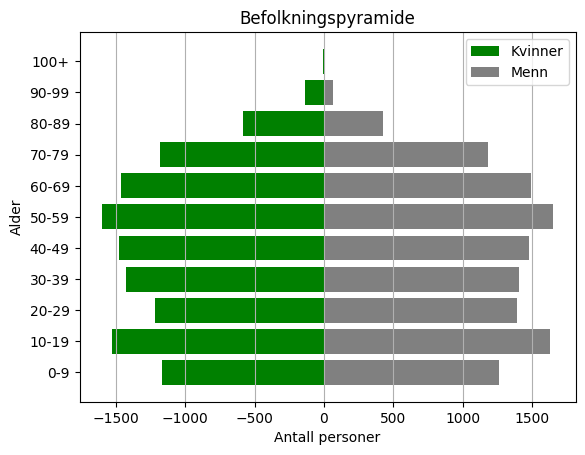

In [171]:
# 1) Lager ny befolkningspyramide: 0-9, 10-19 og så videre

# Henter tabell "alderfordeling for innbyggerne i kommunen", og heretter kalt A.
A = tables[0]
print(A)

# Sørger for at kolonnene er av typen streng og fjern alle ikke-numeriske tegn
A['Kvinner'] = A['Kvinner'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)
A['Menn'] = A['Menn'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)

# Beregner total innbyggere
total_innbyggere_Lindesnes = A['Kvinner'].sum() + A['Menn'].sum()
print(f'Total innbyggere i Lindesnes: {total_innbyggere_Lindesnes} personer.')

# Kombinerer to rader
kvinner = [sum(A['Kvinner'][i:i+2]) for i in range(0, len(A)-1, 2)]
menn = [sum(A['Menn'][i:i+2]) for i in range(0, len(A)-1, 2)]

# Legger til en siste separat linje “100 år eller eldre”
kvinner.append(A['Kvinner'].iloc[-1])
menn.append(A['Menn'].iloc[-1])

# Aldersgrupper 0-9, 10-19 og så videre
aldersgrupper = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

# Lager ny befolkningspyramide
plt.barh(range(len(aldersgrupper)), [-x for x in kvinner], color='green', label='Kvinner')
plt.barh(range(len(aldersgrupper)), menn, color='gray', label='Menn')
plt.yticks(range(len(aldersgrupper)), aldersgrupper)
plt.xlabel('Antall personer')
plt.ylabel('Alder')
plt.title('Befolkningspyramide')
plt.legend()
plt.grid(axis='x')
plt.show()
 

Lindesnes har 23 768 innbyggere.
Det stemmer over ens med tallene presentert på SSBs nettsider, der 23 768 innbyggere i Lindesnes oppgis.

       Land  2025
0   Sverige    53
1   Litauen   147
2     Polen   342
3  Tyskland   234
4   Ukraina   415
5   Eritrea   146
6   Somalia    30
7      Irak    66
8  Pakistan     8
9     Syria   281


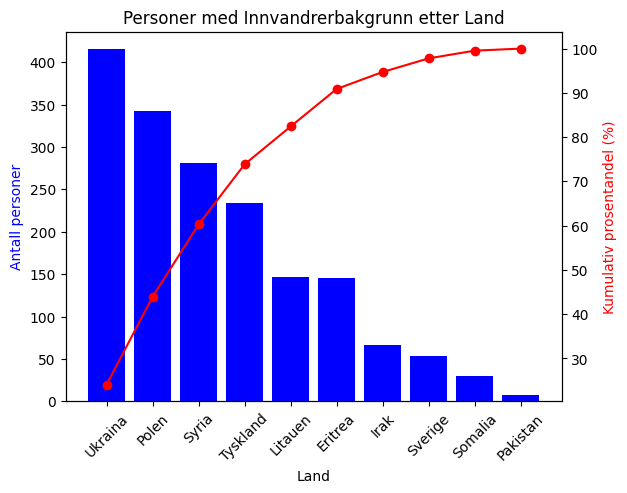

In [172]:
# 2) Pareto diagram for innvandrere i Lindesnes

# Henter tabell "personer med innvandrerbakgrunn", og heretter kalt B.
B = tables[1]
print(B)

# Gir ny navn til kolumner, 'Land' og 'Antall personer'
B.columns = ['Land', 'Antall personer']

# Sørger for at kolonnen er av typen streng og fjern alle ikke-numeriske tegn
B['Antall personer'] = B['Antall personer'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)

# Sorter etter antalle personer i synkende rekkefølge
B = B.sort_values(by='Antall personer', ascending=False)

# beregner kumulativ prosentandel, red linje i bildet
B['Cumulative Percentage'] = B['Antall personer'].cumsum() / B['Antall personer'].sum() * 100

# bruker antall personer til å sette stolpe med blå farger
plt.bar(B['Land'], B['Antall personer'], color='b')
plt.ylabel("Antall personer", color='b')
plt.xlabel("Land")
plt.xticks(rotation=45)

# get current axis，twinx, delt xakse til å legge polylinje ved høyre side
ax2 = plt.gca().twinx()

#bruker cumulative percent til å lage polylinje med marker røde punktene
ax2.plot(B['Land'], B['Cumulative Percentage'], color='r', marker='o')
ax2.set_ylabel("Kumulativ prosentandel (%)", color='r') 
plt.title("Personer med Innvandrerbakgrunn etter Land")
plt.show()

Raden med færrest personer:        Land  Antall personer
8  Pakistan                8
Totalt antall innvandrere: 1722
Total innbyggere uten innvandrerbakgrunn: 22046


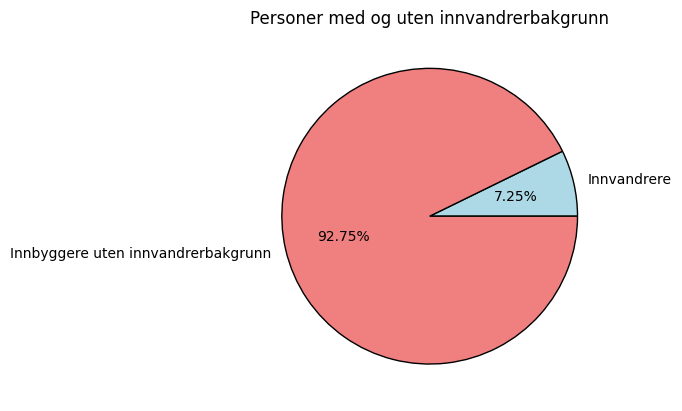

In [173]:
# 2) minimum antall innvandrere i Lindesnes, og kakediagram
# bruke loc for å filtrere rader og spesifisere kolonne, og vise land og antall personer 
minste_rad = B.loc[B['Antall personer'] == B['Antall personer'].min(), ['Land', 'Antall personer']]
print(f"Raden med færrest personer: {minste_rad}")

# Beregn total antall innvandrere
total_innvandrere = B['Antall personer'].sum() 
print(f"Totalt antall innvandrere: {total_innvandrere}")

# beregner innbyggere uten innvandrerbakgrunn
total_innbyggere_uten_innvandrerbakgrunn = total_innbyggere_Lindesnes - total_innvandrere
print(f"Total innbyggere uten innvandrerbakgrunn: {total_innbyggere_uten_innvandrerbakgrunn}")

#lager kakedigram
labels = ['Innvandrere', 'Innbyggere uten innvandrerbakgrunn']
sizes = [total_innvandrere, total_innbyggere_uten_innvandrerbakgrunn]
colors = ['lightblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', wedgeprops={'edgecolor': 'black'})
plt.title("Personer med og uten innvandrerbakgrunn")
plt.show()

Minimum er 8 innvandrere med Pakistan, og total innvandrere 1 722 i Lindesnes.
Total 23 768 innbyggere i Lindesnes inkludret 1 722 innvandrere, derfor har det 22 046 innbyggere uten innvandrerbakgrunn.

                                              Næring   2020
0                        Jordbruk, skogbruk og fiske    312
1                                   Sekundærnæringer  2 919
2  Varehandel, hotell og restaurant, samferdsel, ...  3 184
3                Off.adm., forsvar, sosialforsikring    574
4                                       Undervisning    910
5                          Helse- og sosialtjenester  2 309
6                            Personlig tjenesteyting    342


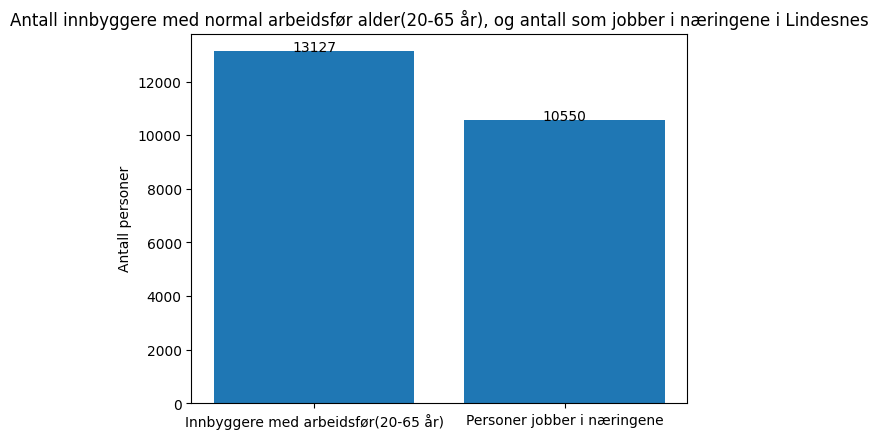

Antall arbeidsledige uten innbyggere (20-65 år) : 10641 personer
Arbeidsledighetsprosent uten innbyggere (20-65 år): 44.77%
Antall arbeidsledige, uten antallet som jobber i næringene: 13218 personer
Arbeidsledighetsprosent, uten antallet som jobber i næringene: 55.61%


In [174]:
# 3) stolpediagram, og estimat for prosentandelen som står utenfor jobb
# henter tabell hva innbyggerne jobber med, og heretter kalt C
C = tables[2]
print(C)

# Sørger for at kolonnen er av typen streng og fjern alle ikke-numeriske tegn
C['2020'] = C['2020'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)

# Beregner innbyggere 20-65 år(dataframe A)
Antall_innbyggere_20_65_Lindesnes = sum(A['Kvinner'][4:13]) + sum(A['Menn'][4:13]) #20-64år, ikke inkludert 65år

# beregner personer jobber i næringene(dataframe C)
Antall_i_næring = C['2020'].sum()

# lager stolpedigram
plt.bar(['Innbyggere med arbeidsfør(20-65 år)', 'Personer jobber i næringene'], [Antall_innbyggere_20_65_Lindesnes, Antall_i_næring])

# legger text over stolper, (+3 lit høyere enn stopler)(viser stregnger)
plt.text(0, Antall_innbyggere_20_65_Lindesnes + 3, str(Antall_innbyggere_20_65_Lindesnes), ha='center')
plt.text(1, Antall_i_næring + 3, str(Antall_i_næring), ha='center')
plt.title('Antall innbyggere med normal arbeidsfør alder(20-65 år), og antall som jobber i næringene i Lindesnes')
plt.ylabel('Antall personer')
plt.show()


# Beregn antall arbeidsledige uten innbyggere (20-65 år, ikke inkludert 65 år)
arbeidsledige_innbyggere = total_innbyggere_Lindesnes - Antall_innbyggere_20_65_Lindesnes

# Beregn arbeidsledighetsprosenten uten innbyggere (20-65 år)
arbeidsledighet_prosent_1 = (arbeidsledige_innbyggere/ total_innbyggere_Lindesnes) * 100

# Skriv ut resultatet
print(f"Antall arbeidsledige uten innbyggere (20-65 år) : {arbeidsledige_innbyggere} personer")
print(f"Arbeidsledighetsprosent uten innbyggere (20-65 år): {arbeidsledighet_prosent_1:.2f}%")

# Beregn antall arbeidsledige uten antallet som jobber i næringene
arbeidsledige_uten_næring = total_innbyggere_Lindesnes - Antall_i_næring

# Beregn arbeidsledighetsprosenten uten antallet som jobber i næringene
arbeidsledighet_prosent_2 = (arbeidsledige_uten_næring / total_innbyggere_Lindesnes) * 100

# Skriv ut resultatet
print(f"Antall arbeidsledige, uten antallet som jobber i næringene: {arbeidsledige_uten_næring} personer")
print(f"Arbeidsledighetsprosent, uten antallet som jobber i næringene: {arbeidsledighet_prosent_2:.2f}%")

Estimatet er dårlig. 
Arbeidsledige inkluderer antall innbyggere med normal arbeidsfør i andre aldre, for eks. 18-20 år.  Og antall innbyggere uten normal arbeidsfør, mens de er i alder 20-65 år. Noen kan være freelance, eller jobber som vanskelig å knytte til de næringene.
Gitt arbeidsledige er ikke nøyaktig om bare med bakgrunn i disse tallene. 

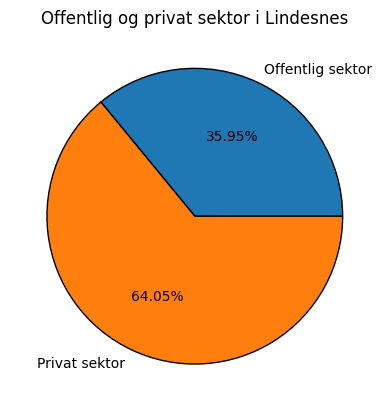

In [175]:
# 3）kakediagram for offentlig og privat sektor

def offentlig_og_privat_sektor_Lindesnes(C): 
    labels = ['Offentlig sektor','Privat sektor']
    offentlig = sum([C['2020'][3]] + [C['2020'][4]] +[C['2020'][5]]) #velger 3,4,og5.rader
    privat = sum([C['2020'][0]] + [C['2020'][1]] +[C['2020'][2]] + [C['2020'][6]]) #velger 0,1,2 og 6. rader
    sizes = [offentlig, privat]
    plt.pie(sizes, labels=labels, autopct='%1.2f%%', wedgeprops={'edgecolor': 'black'})
    plt.title('Offentlig og privat sektor i Lindesnes')
    plt.show()
offentlig_og_privat_sektor_Lindesnes(C)

Denne inndelingen er dårlig.
Kakediagrammet viser bare totale prosentandelene av offentlige og private sektorene, ikke detaljert informasjon som hvilke bransjer og hvor mange innbyggere deles inn i offentlige og private sektorene.

                            Utdanningsnivå Personer 16 år og over
0                           Grunnskolenivå                  4 498
1                   Videregående skolenivå                  8 322
2      Universitets- og høgskolenivå, kort                  4 426
3      Universitets- og høgskolenivå, lang                  1 286
4  Uoppgitt eller ingen fullført utdanning                     93


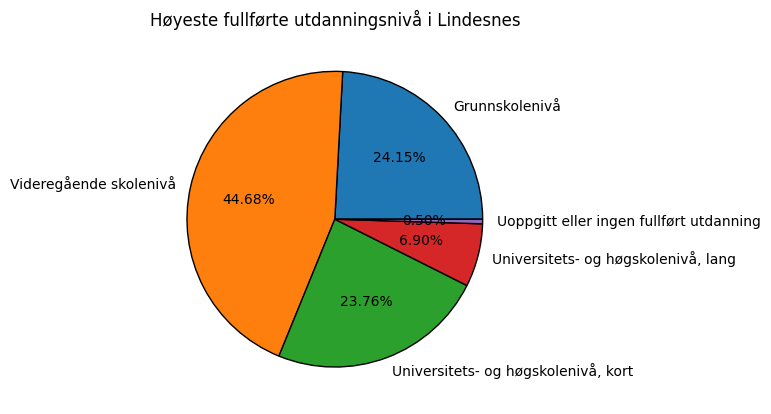

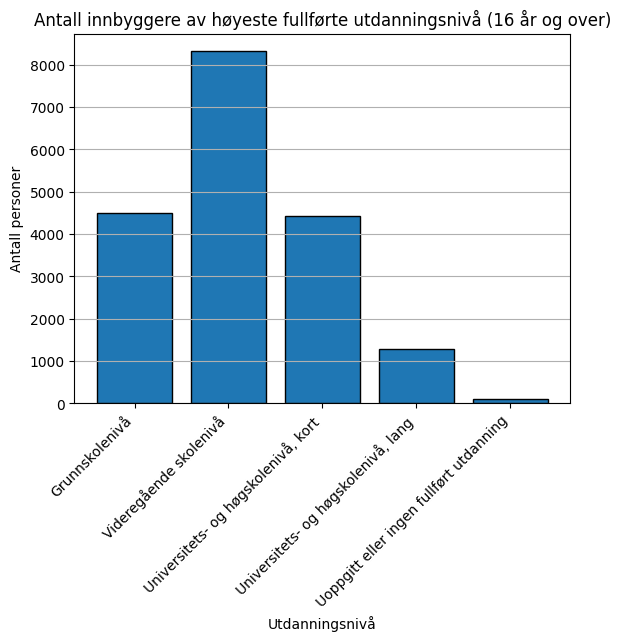

In [176]:
# 4）kakediagrammet og stolpediagram.
# henter tabell høyeste fullførte utdanningsnivå, og heretter kalt D
D = tables[3]
print(D)

# Sørger for at kolonnen er av typen streng og fjern alle ikke-numeriske tegn
D['Personer 16 år og over'] = D['Personer 16 år og over'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)

# lager kakediagram
def kakediagram_utdanningsnivå_Lindesnes(D):
    labels = list(D['Utdanningsnivå'])
    sizes = list(D['Personer 16 år og over'])
    plt.pie(sizes, labels=labels, autopct='%1.2f%%', wedgeprops={'edgecolor': 'black'}) 
    plt.title('Høyeste fullførte utdanningsnivå i Lindesnes')
    plt.show()
kakediagram_utdanningsnivå_Lindesnes(D)

# lager stolpediagram
def stolpediagram_utdanningsnivå_Lindesnes(D):
    labels = list(D['Utdanningsnivå'])
    sizes = list(D['Personer 16 år og over'])
    plt.bar(labels, sizes, edgecolor='black')
    plt.title('Antall innbyggere av høyeste fullførte utdanningsnivå (16 år og over)')
    plt.ylabel('Antall personer')
    plt.xlabel('Utdanningsnivå')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()
stolpediagram_utdanningsnivå_Lindesnes(D)

Kakediagram kan brukes når man viser informasjon for 2–3 kategorier, men det er viktig å vise prosentandeler tydelig.
Kakediagram bør ikke brukes når man viser informasjon med mer enn tre kategorier.

In [177]:
# 5）størrelsen på kulturbudsjettet til Lindesnes, andel 'kommunale idrettsbygg og anlegg' av kulturbudsjettet 
# henter tabell hva bruker kommunen kulturmidlene til, og heretter kalt E
E = tables[5]
print(E)

# Sørger for at kolonnen er av typen streng og fjern alle ikke-numeriske tegn
E['2024'] = E['2024'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)

# størrelsen på kulturbudsjettet per innbygger.
total_budsjett = sum(list(E['2024'])) 
print(f"Kulturbudsjettet til Lindesnes: {total_budsjett} kroner per innbygger.")

# andel 'kommunale idrettsbygg og anlegg' av kulturbudsjettet 
idrettsbygg_og_anlegg = list(E['2024'])[4]   
andel = idrettsbygg_og_anlegg / total_budsjett * 100  
print(f"Kommunale idrettsbygg og anlegg: {andel:.2f}%")

                                Tjenesteområde   2024
0                Aktivitetstilbud barn og unge    214
1                                    Bibliotek    275
2                                       Muséer     93
3  Idrett og tilskudd til andres idrettsanlegg     35
4       Kommunale idrettsbygg og idrettsanlegg  1 569
5                                 Kulturskoler    346
6                         Kommunale kulturbygg    715
Kulturbudsjettet til Lindesnes: 3247 kroner per innbygger.
Kommunale idrettsbygg og anlegg: 48.32%


In [178]:
# 6）prosentandel av kommunens utgifter som ikke er inkludert i datagrunnlaget
# henter tabell utgifter etter utvalgte områder, og heretter kalt F
F = tables[8]
print(F)

# beregner utgifter etter utvalgte områder
kommnunens_utgifter = sum(list(F['2024'])) 
print(f"Lindesnes utgifter etter utvalgte områder: {kommnunens_utgifter} prosent.")

# beregner mangle prosentandel
mangle_prosentandel = 100 - kommnunens_utgifter
print(f'Kommunens utgifter som ikke er inkludert i datagrunnlaget: {mangle_prosentandel:.1f} prosent.')

                          Tjenesteområde  2024
0                  Sosialsektoren samlet   4.5
1                              Barnevern   3.0
2  Vann, avløp, renovasjon, avfall (VAR)   2.5
3                Administrasjon, kommune   5.0
4                Kultursektoren, kommune   4.4
5                              Barnehage   9.5
6                             Grunnskole  19.1
7                       Helse- og omsorg  33.5
Lindesnes utgifter etter utvalgte områder: 81.5 prosent.
Kommunens utgifter som ikke er inkludert i datagrunnlaget: 18.5 prosent.


In [179]:
# 7) omtrentlig andelen hybridbiler, antall biler per person i kjørbar alder(ca.20-80)
# henter tabell typer biler i kommunen, og heretter kalt G
G = tables[6]
print(G)

#Sørger for at kolonnen er av typen streng og fjern alle ikke-numeriske tegn
G['2024'] = G['2024'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)

# beregnger total biler
total_biler = sum(list(G['2024'])) 
print(f'Total biler:{total_biler}.')

# annet drivstoff er hybridbiler
Annet_drivstoff_bil = list(G['2024'])[3]  

#beregner andelen hybridbiler
andel_hybridblier = Annet_drivstoff_bil/total_biler*100
print(f"Omtrentlig andelen hybridbiler(annet drivstoff):{andel_hybridblier:.2f}%")

#beregner innbyggere mellom 20-80 år (dataframe A), ikke inkludert 80år
total_innbyggere_20_80 =  (sum(list(A['Kvinner'])[4:16])) + sum(list(A['Menn'])[4:16]) 
print(f'Total innbyggere mellom 20 til 80:{total_innbyggere_20_80}.')

#beregner antall biler per person i "kjørbar alder" (ca.20-80)
antall_biler_per_person = round(total_biler/total_innbyggere_20_80,2)
print(f'Antall biler per person i kjørbar alder(ca.20-80):{antall_biler_per_person}.')

         Drivstoff   2024
0           Bensin  3 184
1           Diesel  5 508
2              El.  2 755
3  Annet drivstoff  1 371
Total biler:12818.
Omtrentlig andelen hybridbiler(annet drivstoff):10.70%
Total innbyggere mellom 20 til 80:16969.
Antall biler per person i kjørbar alder(ca.20-80):0.76.


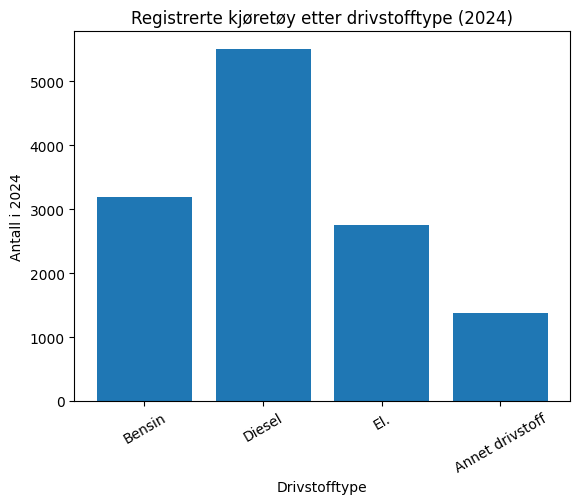

In [180]:
# 8) skrive en funksjon, test fuksjonen på ett av datasettene tilhørende oppgaven

#bruker dataframe G til å lage stolpediagram
def biler_stolpediagram(G):
    plt.bar(G['Drivstoff'], G['2024'])
    plt.xlabel('Drivstofftype')
    plt.ylabel('Antall i 2024')
    plt.title('Registrerte kjøretøy etter drivstofftype (2024)')
    plt.xticks(rotation=30)
    plt.show()
biler_stolpediagram(G)

Funksjonen trenger ikke et return statement, fordi funksjonen brukes bare å vise stolpediagram, ikke for å beregne eller returnere en verdi. Dermed er ingenting her som må returneres.

In [181]:
# 9) bruker samme metode som før, å besøke nettside og hente dataframe om Tromsø 
driver = webdriver.Chrome()
url2 = "https://www.ssb.no/kommunefakta/tromso"
driver.get(url2)
html_content = driver.page_source
html_file = StringIO(html_content)
tables = pd.read_html(html_file, decimal=",", thousands=".", keep_default_na=False)
driver.quit()


                            Utdanningsnivå Personer 16 år og over
0                           Grunnskolenivå                 13 373
1                   Videregående skolenivå                 19 923
2      Universitets- og høgskolenivå, kort                 17 859
3      Universitets- og høgskolenivå, lang                 12 003
4  Uoppgitt eller ingen fullført utdanning                    199
                            Utdanningsnivå  Personer 16 år og over
0                           Grunnskolenivå                    4498
1                   Videregående skolenivå                    8322
2      Universitets- og høgskolenivå, kort                    4426
3      Universitets- og høgskolenivå, lang                    1286
4  Uoppgitt eller ingen fullført utdanning                      93


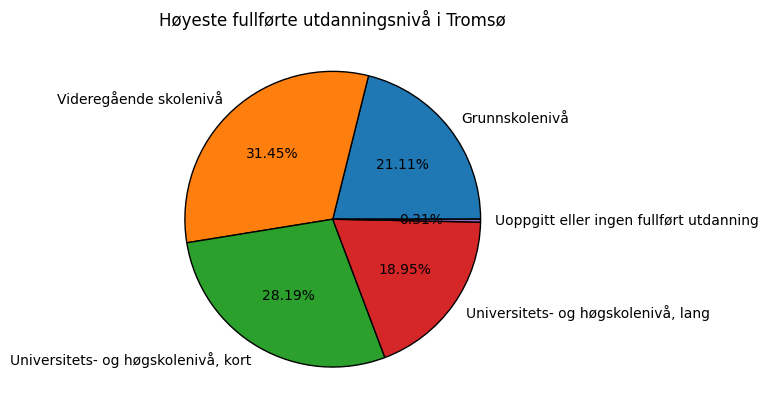

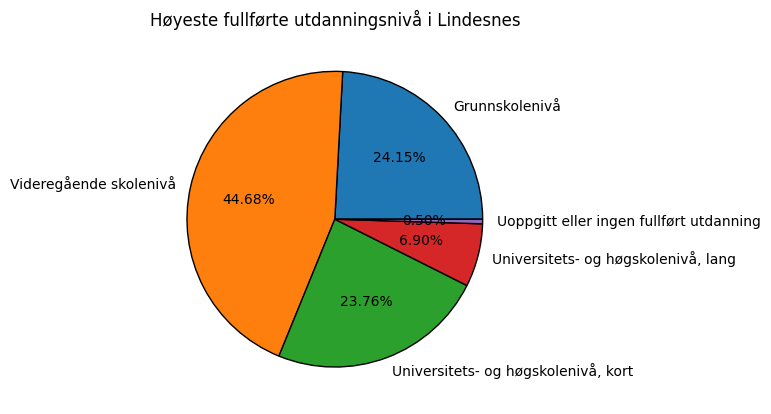

In [182]:
# sammenligne utdanningsnivået i din tildelte kommune og Tromsø.
# henter tabell høyeste fullførte utdanningsnivå, og heretter kalt TU
TU = tables[3]
print(TU)

print(D)

# Sørger for at kolonnen er av typen streng og fjern alle ikke-numeriske tegn
TU['Personer 16 år og over'] = TU['Personer 16 år og over'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)

# kakedigrammet for fullførte utdanningsnivå i Tromsø
labels = list(TU['Utdanningsnivå'])
sizes = list(TU['Personer 16 år og over'])
plt.pie(sizes, labels=labels, autopct='%1.2f%%', wedgeprops={'edgecolor': 'black'}) 
plt.title('Høyeste fullførte utdanningsnivå i Tromsø')
plt.show()

#viser kakediagrammet for fullfurte utdanningsnivå i Lindesnes
kakediagram_utdanningsnivå_Lindesnes(D)

Tydelige forskjeller er fullførte VG skole, og universitet og høyskole, med lang tid. Lindesnes har 44.68% fullført VG skole, Tromsø har 31.45%. Lindesnes har 6.9% fullførte universitet og høyskole med lang tid, Tromsø har 18.95%.

                                              Næring    2020
0                        Jordbruk, skogbruk og fiske     670
1                                   Sekundærnæringer   5 205
2  Varehandel, hotell og restaurant, samferdsel, ...  15 018
3                Off.adm., forsvar, sosialforsikring   2 729
4                                       Undervisning   5 362
5                          Helse- og sosialtjenester  11 178
6                            Personlig tjenesteyting   1 691


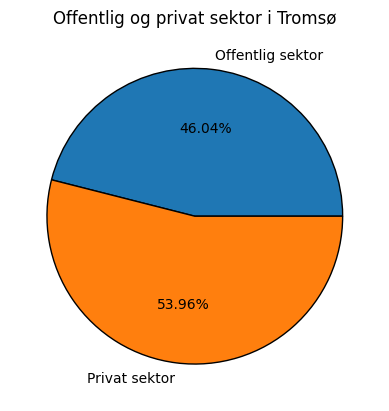

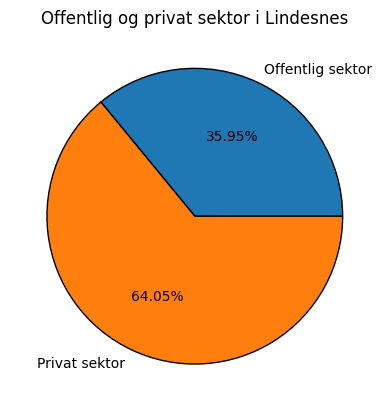

In [183]:
#sammenlign omtrentlig «offentlig» mot «privat» sektor (se oppgave (3)) for din tildelte kommune og Tromsø.

# henter tabell hva jobber innbyggerne med, og heretter kalt TJ
TJ = tables[2]
print(TJ)

# Sørger for at kolonnen er av typen streng og fjern alle ikke-numeriske tegn
TJ['2020'] = TJ['2020'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)

# lager kakediagram
labels = ['Offentlig sektor','Privat sektor']
offentlig = sum([TJ['2020'][3]] + [TJ['2020'][4]] +[TJ['2020'][5]]) #velger 3.4.og 5 rader
privat = sum([TJ['2020'][0]] + [TJ['2020'][1]] +[TJ['2020'][2]] + [TJ['2020'][6]]) #velger 0.1.2.og 6 rader
sizes = [offentlig, privat]
plt.pie(sizes, labels=labels, autopct='%1.2f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Offentlig og privat sektor i Tromsø')
plt.show()

#viser kakediagrammet for offentlig_og_privat_sektor i Lindesnes
offentlig_og_privat_sektor_Lindesnes(C)


In [184]:
# sammenlign omtrentlig arbeidsstokken(20-65år) i Lindesnes og Tromsø
#tabell aldersfordling for innbyggerne i kommunen, herett kalt TA
TA = tables[0]
print(TA)

# Sørg for at kolonnen er av typen streng og fjern alle ikke-numeriske tegn
TA['Kvinner'] = TA['Kvinner'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)
TA['Menn'] = TA['Menn'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)

# beregn total innbyggere i Tromsø
Total_innbyggere_Tromsø = TA['Kvinner'].sum() + TA['Menn'].sum()
print(f'Total innbyggere i Tromsø: {Total_innbyggere_Tromsø} personer.')

# Beregner innbyggere 20-65 år(dataframe TJ)
Antall_innbyggere_20_65_Tromsø = sum(TA['Kvinner'][4:13]) + sum(TA['Menn'][4:13]) #20-64år, ikke inkludert 65år
print(f'Antall innbyggere mellom 20 til 65 år i Tromsø: {Antall_innbyggere_20_65_Tromsø} personer.')

# prosent for innbyggere jobber i næringene (20-65) av total innbyggere i Tromsø
prosentandelen_normal_arbeidsfør_Tromsø = Antall_innbyggere_20_65_Tromsø / Total_innbyggere_Tromsø *100
print(f'Prosentandelen innbyggere i Tromsø i normal arbeidsfør alder (20-65 år): {prosentandelen_normal_arbeidsfør_Tromsø: .2f}%')

print(f'Total innbyggere i Lindesnes:{total_innbyggere_Lindesnes} personer.')
print(f'Total innbyggere 20-65 år i Lindsnes:{Antall_innbyggere_20_65_Lindesnes} personer.')
#prosent for innbyggere jobber i næringene (20-65) av total innbyggere i Lindesnes
prosentandelen_normal_arbeidsfør_Lindesnes = Antall_innbyggere_20_65_Lindesnes/total_innbyggere_Lindesnes *100
print(f'Prosentandelen innbyggere i Lindesnes i normal arbeidsfør alder (20-65 år): {prosentandelen_normal_arbeidsfør_Lindesnes: .2f}%')


                 Alder Kvinner   Menn
0               0-4 år  −1 899  1 997
1               5-9 år  −1 936  1 981
2             10-14 år  −2 042  2 223
3             15-19 år  −2 218  2 487
4             20-24 år  −2 759  2 671
5             25-29 år  −3 474  3 536
6             30-34 år  −3 289  3 591
7             35-39 år  −2 843  2 915
8             40-44 år  −2 576  2 726
9             45-49 år  −2 433  2 445
10            50-54 år  −2 671  2 729
11            55-59 år  −2 553  2 588
12            60-64 år  −2 203  2 112
13            65-69 år  −1 918  1 805
14            70-74 år  −1 670  1 579
15            75-79 år  −1 414  1 245
16            80-84 år    −900    779
17            85-89 år    −477    326
18            90-94 år    −201    123
19            95-99 år     −58     20
20  100 år eller eldre      −7      2
Total innbyggere i Tromsø: 79421 personer.
Antall innbyggere mellom 20 til 65 år i Tromsø: 50114 personer.
Prosentandelen innbyggere i Tromsø i normal arbeidsfør al

Tromsø har mer arbeidsstokken enn Lindesnes.

[1335, 1274, 1385, 1446, 1485, 1469, 1620, 1630, 1483]
[5430, 7010, 6880, 5758, 5302, 4878, 5400, 5141, 4315]


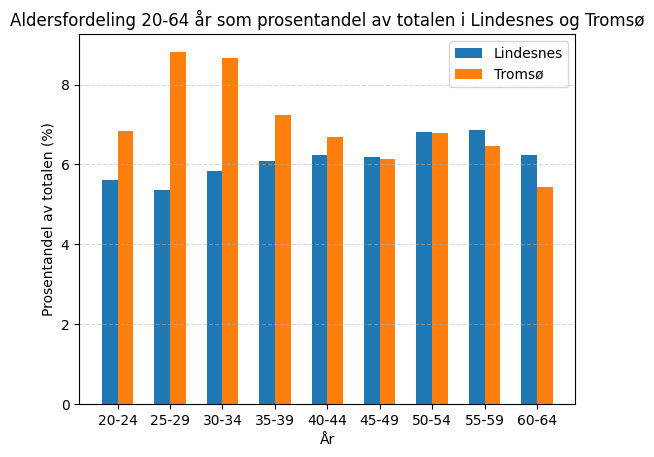

In [185]:
# lager stoplediagram for sammenlingne arbeidsstokken i Lindesnes og Tromsø

A_kvinner = A['Kvinner'].tolist() # konventerer dataframe A Kvinner-kolonnen til list
A_menn = A['Menn'].tolist()
TA_kvinner = TA['Kvinner'].tolist()
TA_menn = TA['Menn'].tolist()

#beregner kvinner og menn per rad
A_total = [k + m for k, m in zip(A_kvinner, A_menn)]
TA_total = [k + m for k, m in zip(TA_kvinner, TA_menn)]

 
# Beregner total 
sum_A = sum(A_total)
sum_TA = sum(TA_total)

A_total = A_total[4:13]  # fra 4.raden til og med 12.raden, ikke 13.raden
TA_total = TA_total[4:13]  # 20-64år
print(A_total)# print og sjekk total kvinner og menn per rad(Lindesnes) 
print(TA_total)# total kvinner og menn(Tromsø)

# Prosent per aldersgruppe
A_pct = [x / sum_A * 100 for x in A_total]
TA_pct = [x / sum_TA * 100 for x in TA_total]

# Aldersgrupper
aldersgrupper = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']

# stoplediagram
x = range(len(aldersgrupper))
bar_width = 0.3

plt.bar([i - bar_width/2 for i in x], A_pct, width=bar_width, label='Lindesnes')
plt.bar([i + bar_width/2 for i in x], TA_pct, width=bar_width, label='Tromsø')

plt.xticks(x, aldersgrupper)
plt.ylabel('Prosentandel av totalen (%)')
plt.xlabel('År')
plt.title('Aldersfordeling 20-64 år som prosentandel av totalen i Lindesnes og Tromsø')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

Tromsø har tydelig mer prosentandel av total innbyggere mellom 20-44år enn Lindesnes. Og litt mindre prosentandel av total innbyggere mellom 45-64 år enn Lindesnes.